#Biliotecas Utilizadas

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopandas
import geopandas as gpd

#Importação e Tratamento inicial de dados

##Construção do dataframe inicial

Foram removidas varias colunas com dados que não serão utilizados nesta analise, com isso foi possivel reduzir o arquivo completo para pouco mais de 1GB, a celula comentada abaixo contem  o scrip utilizado para remover as colunas.

In [ ]:
''''
import pandas as pd
dados = pd.read_csv('MICRODADOS_ENEM_2019.csv',sep=';' ,encoding='latin1')

colunas_nao_utilizadas = ['NU_INSCRICAO','CO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','CO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO','CO_ESCOLA','CO_MUNICIPIO_ESC','CO_UF_ESC',
                          'IN_SEM_RECURSO','IN_BRAILLE','IN_AMPLIADA_24','IN_AMPLIADA_18','IN_LEDOR','IN_TRANSCRICAO','IN_LIBRAS','IN_TEMPO_ADICIONAL','IN_LEITURA_LABIAL','IN_MESA_CADEIRA_RODAS',
                          'IN_MESA_CADEIRA_SEPARADA','IN_APOIO_PERNA','IN_GUIA_INTERPRETE','IN_COMPUTADOR','IN_CADEIRA_ESPECIAL','IN_CADEIRA_CANHOTO','IN_CADEIRA_ACOLCHOADA','IN_PROVA_DEITADO','IN_MOBILIARIO_OBESO',
                          'IN_LAMINA_OVERLAY','IN_PROTETOR_AURICULAR','IN_MEDIDOR_GLICOSE','IN_MAQUINA_BRAILE','IN_SOROBAN','IN_MARCA_PASSO','IN_SONDA','IN_MEDICAMENTOS','IN_SALA_INDIVIDUAL','IN_SALA_ESPECIAL','IN_SALA_ACOMPANHANTE','IN_MOBILIARIO_ESPECIFICO',
                          'IN_MATERIAL_ESPECIFICO','IN_NOME_SOCIAL','Q003','Q004','Q007','Q008','Q009','Q010','Q011','Q012','Q013','Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023',
                          'CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT','TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT']

dados = dados.drop(colunas_nao_utilizadas,axis=1)       
dados.to_csv('MICRODADOS_ENEM_2019_FILTRADO.csv',sep=',' ,encoding='utf-8' )    
'''               

"'\nimport pandas as pd\ndados = pd.read_csv('MICRODADOS_ENEM_2019.csv',sep=';' ,encoding='latin1')\n\ncolunas_nao_utilizadas = ['NU_INSCRICAO','CO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','CO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO','CO_ESCOLA','CO_MUNICIPIO_ESC','CO_UF_ESC',\n                          'IN_SEM_RECURSO','IN_BRAILLE','IN_AMPLIADA_24','IN_AMPLIADA_18','IN_LEDOR','IN_TRANSCRICAO','IN_LIBRAS','IN_TEMPO_ADICIONAL','IN_LEITURA_LABIAL','IN_MESA_CADEIRA_RODAS',\n                          'IN_MESA_CADEIRA_SEPARADA','IN_APOIO_PERNA','IN_GUIA_INTERPRETE','IN_COMPUTADOR','IN_CADEIRA_ESPECIAL','IN_CADEIRA_CANHOTO','IN_CADEIRA_ACOLCHOADA','IN_PROVA_DEITADO','IN_MOBILIARIO_OBESO',\n                          'IN_LAMINA_OVERLAY','IN_PROTETOR_AURICULAR','IN_MEDIDOR_GLICOSE','IN_MAQUINA_BRAILE','IN_SOROBAN','IN_MARCA_PASSO','IN_SONDA','IN_MEDICAMENTOS','IN_SALA_INDIVIDUAL','IN_SALA_ESPECIAL','IN_SALA_ACOMPANHANTE','IN_MOBILIARIO_ESPECIFICO',\n                          'IN_MATERIAL_ESPECI

Mesmo com a remoção dos dados, varios graficos não foram possiveis de serem gerados por esgoratem os recursos computacionais disponiveis, desta forma então foi utilizado a amostra fornecida pela Alura(Removendo as mesmas colunas) na semana de imersão dados. Os dados completos e filtrados ainda estão disponiveis. Caso desejem utilizalos é só substituir a fonte com o link abaixo:

src_enem2019 = 'https://www.dropbox.com/s/al8za2urz0zuqkz/MICRODADOS_ENEM_2019_FILTRADOS.csv?dl=1'



##Importando os dados

In [ ]:
src_enem2019 = 'https://www.dropbox.com/s/zsj7av8zar49bfo/MICRODADOS_ENEM_2019_SAMPLE_FILTRADO.csv?dl=1'

dados_enem_2019 = pd.read_csv(src_enem2019)

In [ ]:
dados_enem_2019 = dados_enem_2019.drop(['Unnamed: 0'],axis=1)

In [ ]:
dados_enem_2019.head()

,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_ACESSO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q024,Q025
0,2019,Redenção,PA,17,M,1,3,1,Redenção,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,435.6,512.3,488.6,432.4,1,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,4,B,B,B
1,2019,Marabá,PA,23,M,1,3,1,Marabá,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,409.3,375.3,NaN,1,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,4,B,A,B
2,2019,Belém,PA,35,F,2,1,1,Belém,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,423.2,499.1,441.0,427.2,1,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,5,C,A,B
3,2019,São Félix do Xingu,PA,23,F,1,3,1,Ourilândia do Norte,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1507300,São Félix do Xingu,15,PA,1,1,1,1,426.2,578.1,551.5,499.9,1,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,1,B,A,B
4,2019,Ananindeua,PA,16,F,1,3,1,Ananindeua,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1500800,Ananindeua,15,PA,1,1,1,1,516.5,571.3,511.2,424.5,0,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,3,E,A,B


Carregando os dados georeferenciados para traças os limites das unidades federativas.

A fonte de dados é o IBGE(https://www.ibge.gov.br/geociencias/downloads-geociencias.html)

In [ ]:
geo_src = 'https://www.dropbox.com/s/6so56ucaehcekac/bcim_2016_21_11_2018.gpkg?dl=1'
UF_LIM = gpd.read_file(geo_src,layer='lim_unidade_federacao_a')
UF_LIM.drop(UF_LIM.columns[0:3],axis=1,inplace=True)
UF_LIM.drop(UF_LIM.columns[1:8],axis=1,inplace=True)
UF_LIM.rename(columns={'sigla':'ESTADO'},inplace=True)

UF: RJ


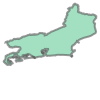

In [ ]:
#Teste
print('UF: '+UF_LIM.ESTADO[16])
UF_LIM.geometry[16]


#Cálcluo das notas medias

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
redacao = ["NU_NOTA_REDACAO"]
dados_enem_2019['NT_TOTAL_MEDIA'] = (dados_enem_2019[provas].sum(axis=1) + dados_enem_2019[redacao].sum(axis=1))/5
dados_enem_2019['NT_MEDIA_SEM_REDACAO'] = dados_enem_2019[provas].sum(axis=1)/4

Para  as  notas superiores à 600 a nota de redação não foi capaz de melhorar a media dos alunos, porem há uma grande discrepância nas notas medias inferiores à 550.

#Construindo o perfil do enem por estado

In [ ]:
dados_enem_2019_estado = pd.DataFrame()
dados_enem_2019_estado['ESTADO'] = dados_enem_2019['SG_UF_RESIDENCIA'].unique()

##Moda e Media das notas por estado

In [ ]:

#Nota media geral do estado, medias iguais à  0 foram desconsideradas
media_estado=[]
for  i  in dados_enem_2019_estado['ESTADO']:
  media_estado.append((dados_enem_2019['NT_TOTAL_MEDIA'][dados_enem_2019['NT_TOTAL_MEDIA']!=0][dados_enem_2019['SG_UF_RESIDENCIA']== i]).mean())

dados_enem_2019_estado['NOTA_MEDIA'] = media_estado 

#Moda das  notas por estado, medias iguais à  0 foram desconsideradas
moda_estado=[]
for  i  in dados_enem_2019_estado['ESTADO']:
  moda_estado.append((dados_enem_2019['NT_TOTAL_MEDIA'][dados_enem_2019['NT_TOTAL_MEDIA']!=0][dados_enem_2019['SG_UF_RESIDENCIA']== i]).mode()[0])
dados_enem_2019_estado['MODA_NOTAS'] = moda_estado 

#Nota media de redação do estado, medias iguais à  0 foram desconsideradas
media_estado=[]
for  i  in dados_enem_2019_estado['ESTADO']:
  media_estado.append(int((dados_enem_2019['NU_NOTA_REDACAO'][dados_enem_2019['NU_NOTA_REDACAO']!=0][dados_enem_2019['SG_UF_RESIDENCIA']== i]).mean()))

dados_enem_2019_estado['NOTA_MEDIA_REDACAO'] = media_estado 


##Percentual de notas maiores que 900, 800 e menores que 500 e maiores medias de redação por estado

In [ ]:
percentual_notas_maiores_900=[]
for  i  in dados_enem_2019_estado['ESTADO']:
  qty_notas_maiores_900=0
  qty_notas_validas_estado=0
  qty_notas_maiores_900 = len(dados_enem_2019['NT_TOTAL_MEDIA'][dados_enem_2019['NT_TOTAL_MEDIA']>=900][dados_enem_2019['SG_UF_RESIDENCIA']== i])
  qty_notas_validas_estado = len(dados_enem_2019['NT_TOTAL_MEDIA'][dados_enem_2019['NT_TOTAL_MEDIA']!=0][dados_enem_2019['SG_UF_RESIDENCIA']== i])
  percentual_notas_maiores_900.append(round(qty_notas_maiores_900/qty_notas_validas_estado*100,2))

dados_enem_2019_estado['%_NOTA_MAIOR_900'] = percentual_notas_maiores_900 

In [ ]:
percentual_notas_maiores_800=[]
for  i  in dados_enem_2019_estado['ESTADO']:
  qty_notas_maiores_800=0
  qty_notas_validas_estado=0
  qty_notas_maiores_800 = len(dados_enem_2019['NT_TOTAL_MEDIA'][dados_enem_2019['NT_TOTAL_MEDIA']>=800][dados_enem_2019['SG_UF_RESIDENCIA']== i])
  qty_notas_validas_estado = len(dados_enem_2019['NT_TOTAL_MEDIA'][dados_enem_2019['NT_TOTAL_MEDIA']!=0][dados_enem_2019['SG_UF_RESIDENCIA']== i])
  percentual_notas_maiores_800.append(round(qty_notas_maiores_800/qty_notas_validas_estado*100,2))

dados_enem_2019_estado['%_NOTA_MAIOR_800'] = percentual_notas_maiores_800 

In [ ]:
percentual_notas_menores_500=[]
for  i  in dados_enem_2019_estado['ESTADO']:
  qty_notas_menores_500=0
  qty_notas_validas_estado=0
  qty_notas_menores_500 = len(dados_enem_2019['NT_TOTAL_MEDIA'][dados_enem_2019['NT_TOTAL_MEDIA'] !=0][dados_enem_2019['NT_TOTAL_MEDIA'] <=500][dados_enem_2019['SG_UF_RESIDENCIA']== i])
  qty_notas_validas_estado = len(dados_enem_2019['NT_TOTAL_MEDIA'][dados_enem_2019['NT_TOTAL_MEDIA']!=0][dados_enem_2019['SG_UF_RESIDENCIA']== i])
  percentual_notas_menores_500.append(round(qty_notas_menores_500/qty_notas_validas_estado*100,2))

dados_enem_2019_estado['%_NOTA_MENOR_500'] = percentual_notas_menores_500 

In [ ]:
percentual_notas_redacao_maiores_592=[]
for  i  in dados_enem_2019_estado['ESTADO']:
  qty_notas_maiores_592=0
  qty_notas_validas_estado=0
  qty_notas_maiores_592 = len(dados_enem_2019['NU_NOTA_REDACAO'][dados_enem_2019['NU_NOTA_REDACAO']>=592][dados_enem_2019['SG_UF_RESIDENCIA']== i])
  qty_notas_validas_estado = len(dados_enem_2019['NU_NOTA_REDACAO'][dados_enem_2019['NU_NOTA_REDACAO']!=0][dados_enem_2019['SG_UF_RESIDENCIA']== i])
  percentual_notas_redacao_maiores_592.append(round(qty_notas_maiores_592/qty_notas_validas_estado*100,2))

dados_enem_2019_estado['%_MELHORES_NOTAS_REDACAO'] = percentual_notas_redacao_maiores_592 

##Composição por renda por estado

In [ ]:
def composicao_aluno_renda(classe_renda):
  composicao_classe=[]
  for  i  in dados_enem_2019_estado['ESTADO']:
    composicao_classe.append(round(len(dados_enem_2019['Q006'][dados_enem_2019['Q006']==classe_renda][dados_enem_2019['SG_UF_RESIDENCIA']==i])/len(dados_enem_2019['Q006'][dados_enem_2019['SG_UF_RESIDENCIA']==i])*100,2))
  return composicao_classe



In [ ]:
rendas = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']
for i in rendas:
  dados_enem_2019_estado['%'+i]=composicao_aluno_renda(i)
composicao_rendas = ['%A','%B','%C','%D','%E','%F','%G','%H','%I','%J','%K','%L','%M','%N','%O','%P','%Q']

Adicionando Geometria do estado

In [ ]:
dados_enem_2019_estado=UF_LIM.merge(dados_enem_2019_estado, on='ESTADO', how='left')


#<b>   Enem 2019</b>
##Um retrato do Brasil

<p>O enem é uma fonte valiosa de dados sobre o país, não somente sobre o sistema educacional, mas tamebm sobre fatores socioeconômico.
<p>A apresentação abaixo tem como objetivo retratar os resultados do enem juntamente com fatores socioeconômico e geográficos.


##A arte da escrita:

Tendo como base as notas de redação podemos traçar um perfil do aluno que escreve bem

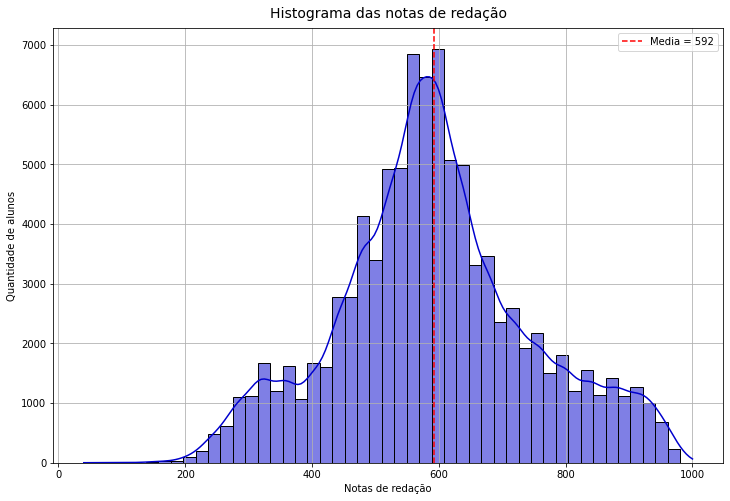

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=dados_enem_2019.query('NU_NOTA_REDACAO !=0'),x='NU_NOTA_REDACAO',kde=True,bins=49,color='mediumblue')
media = int(dados_enem_2019['NU_NOTA_REDACAO'][dados_enem_2019['NU_NOTA_REDACAO']!=0].mean())

plt.axvline(media,color='r',linestyle='--',label='Media = '+str(media))

plt.title('Histograma das notas de redação', fontsize=14, pad=10)
plt.xlabel('Notas de redação')
plt.ylabel('Quantidade de alunos')

plt.legend()
plt.grid(True)
plt.show()

Com o histograma acima podemos observar uma boa distribuição nos alunos com notas acima e abaixo da média.
<p>Mas queremos selecionar os  alunos com  nstas acma da media, como seria o histograma desses alunos?

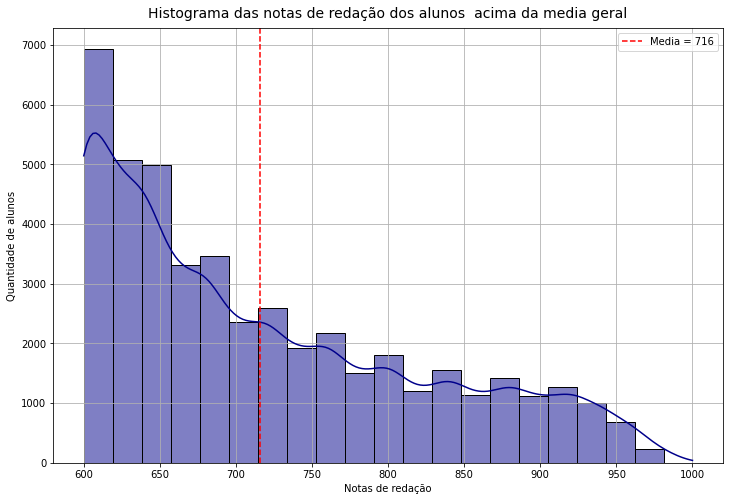

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=dados_enem_2019.query('NU_NOTA_REDACAO >592'),x='NU_NOTA_REDACAO',kde=True,bins=21,color='darkblue')


media = int(dados_enem_2019['NU_NOTA_REDACAO'][dados_enem_2019['NU_NOTA_REDACAO']>=592].mean())

plt.axvline(media,color='r',linestyle='--',label='Media = '+str(media))

plt.title('Histograma das notas de redação dos alunos  acima da media geral', fontsize=14, pad=10)
plt.xlabel('Notas de redação')
plt.ylabel('Quantidade de alunos')

plt.legend()


plt.grid(True)
plt.show()

A seguir iremos verificar o perfil economico dos alunos acima da média

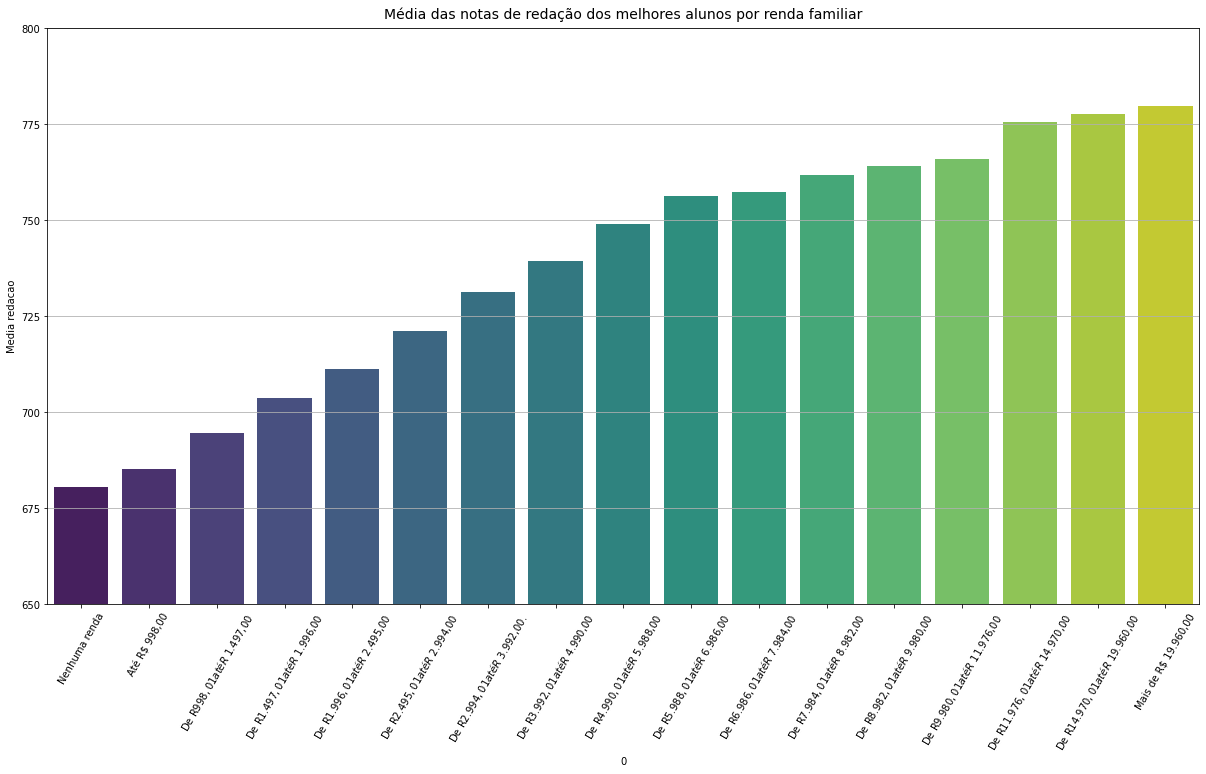

In [ ]:
rendas = {'A':'Nenhuma renda','B':'Até R$ 998,00','C':'De R$ 998,01 até R$ 1.497,00','D':'De R$ 1.497,01 até R$ 1.996,00','E':'De R$ 1.996,01 até R$ 2.495,00','F':'De R$ 2.495,01 até R$ 2.994,00','G':'De R$ 2.994,01 até R$ 3.992,00.','H':'De R$ 3.992,01 até R$ 4.990,00','I':'De R$ 4.990,01 até R$ 5.988,00','J':'De R$ 5.988,01 até R$ 6.986,00','K':'De R$ 6.986,01 até R$ 7.984,00','L':'De R$ 7.984,01 até R$ 8.982,00','M':'De R$ 8.982,01 até R$ 9.980,00','N':'De R$ 9.980,01 até R$ 11.976,00','O':'De R$ 11.976,01 até R$ 14.970,00','P':'De R$ 14.970,01 até R$ 19.960,00','Q':'Mais de R$ 19.960,00'}
rendas_ticks =[]
for i in rendas:
  rendas_ticks.append(rendas[i])

medias_renda = pd.DataFrame.from_dict(rendas,orient ='index')

lista_media_renda = []
for i in medias_renda.index:
  lista_media_renda.append(round(dados_enem_2019['NU_NOTA_REDACAO'][dados_enem_2019['NU_NOTA_REDACAO']>=592][dados_enem_2019['Q006']==i].dropna().mean(),2))
medias_renda['Media redacao'] = lista_media_renda

medias_renda.rename(columns={0:'Renda'})

fig = plt.figure(figsize=(16,8))
axis = fig.add_axes([0,0,1,1])


plt.title('Média das notas de redação dos melhores alunos por renda familiar', fontsize=14, pad=10)

index=range(len(rendas_ticks))

axis.grid(True)
sns.barplot(data= medias_renda,y='Media redacao',x=0, palette='viridis')

axis.set_ylim(650,800)

axis.set_yticks([650,675,700,725,750,775,800])
axis.set_xticks(index)
axis.set_xticklabels(rendas_ticks)
plt.xticks(rotation=60)
plt.show()

É realmente notavel em que mesmo entre os melhores alunos as notas crescem a medida  que a renda familiar aumenta, é ainda mais notavel a escala de crescimento das categorias ate R$6.986,00

<p>Mas qual a composição deles nos estados brasileiros

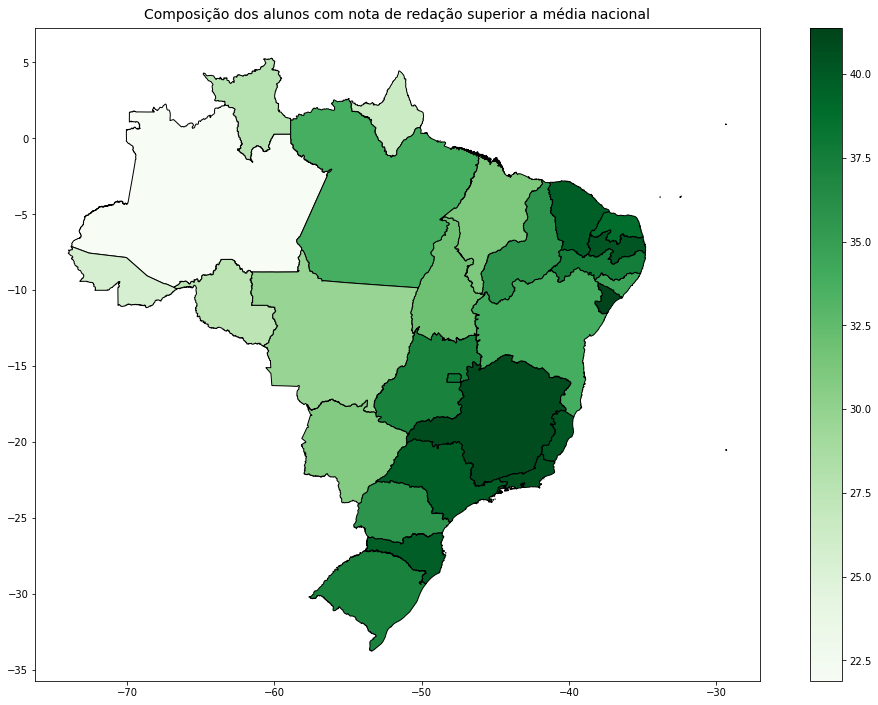

In [ ]:
dados_enem_2019_estado.plot(column='%_MELHORES_NOTAS_REDACAO', cmap='Greens', figsize=(18,12),legend=True,edgecolor='k')
plt.title('Composição dos alunos com nota de redação superior a média nacional', fontsize=14, pad=10)
plt.show()

Com base nas informações acima podemos estimar que o aluno com a nota mais alta de redação mora  no Sudeste e possui renda familiar acima de R$ 19.960,00

##As notas

Notas não são o melhor jeito de  medir o conhecimento de alguem porem é o melhor que temos para conseguir avaliar tantas pessoas simultaneamente. Inflizmente tambem é somente com essa medição que se pode ter acesso as melhores instituições de ensino do pais. Portanto fazer uma  analise  destes valores é de suma importancia.

Primeiramente vamos plotar um histograma das notas media válidas(Médias não zeradas)

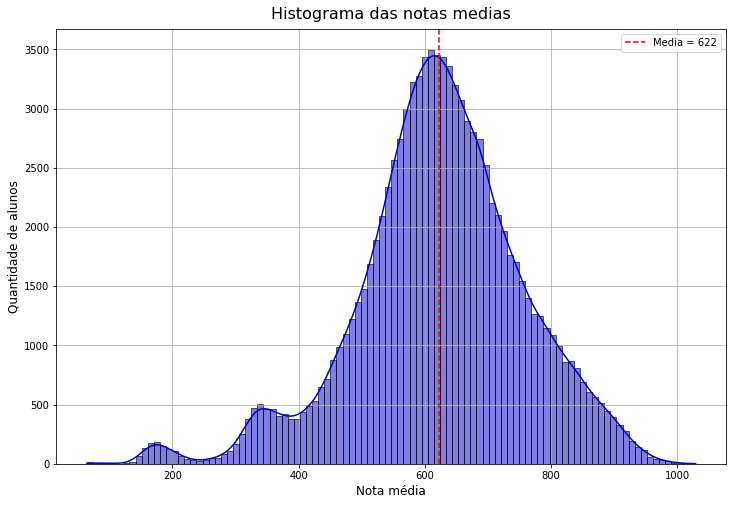

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=dados_enem_2019.query('NT_TOTAL_MEDIA !=0'),x='NT_TOTAL_MEDIA',kde=True,bins=100,color='mediumblue')
media = int(dados_enem_2019['NT_TOTAL_MEDIA'][dados_enem_2019['NT_TOTAL_MEDIA']!=0].mean())

plt.axvline(media,color='r',linestyle='--',label='Media = '+str(media))

plt.title('Histograma das notas medias', fontsize=16, pad=10)
plt.xlabel('Nota média', fontsize=12)
plt.ylabel('Quantidade de alunos', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

Assim como o histograma de redação a distribuição das notas medias é  similar a uma distribuição normal.
<p>A nota media de redação é inferior a média geral, será que a nota média esta sendo puxada para baixo pela nota de redação?

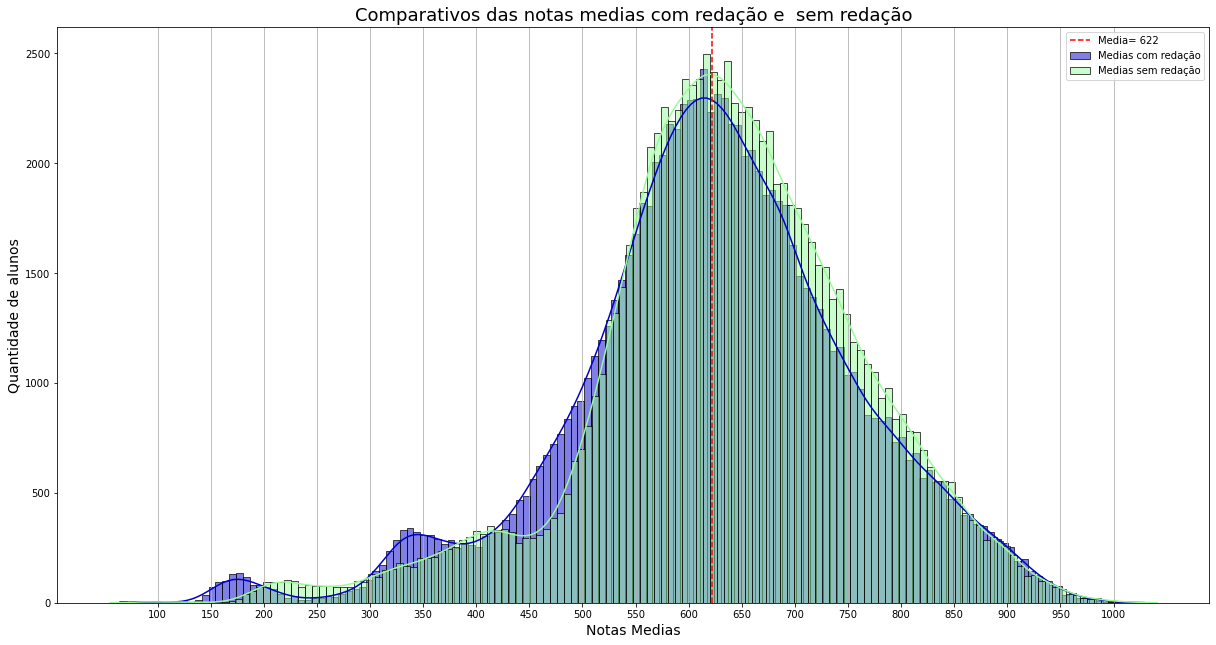

In [ ]:
fig = plt.figure(figsize=(16,8))
axis= fig.add_axes([0,0,1,1])

sns.histplot(data=dados_enem_2019.query('NT_TOTAL_MEDIA !=0'),x='NT_TOTAL_MEDIA',label='Medias com redação',kde=True,bins=150,color='mediumblue')
sns.histplot(data=dados_enem_2019.query('NT_TOTAL_MEDIA !=0'),x='NT_MEDIA_SEM_REDACAO',color='palegreen',label='Medias sem redação',kde=True,bins=150)

axis.set_xticks([100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000])
plt.grid(axis='x')

plt.axvline(media,color='r',linestyle='--',label='Media= '+str(media))

axis.legend()

plt.title('Comparativos das notas medias com redação e  sem redação', fontsize=18)

axis.set_xlabel('Notas Medias',fontsize=14)
axis.set_ylabel('Quantidade de alunos',fontsize=14)


plt.show()

Pode se observar que na maior parte dos casos a nota de redação tende a reduzir a media geral. Tambem é curioso ver que a nota de redação ajudou os alunos com media geral entre 420 e 520

Dizem que uma das grandes dificuldades dos alunos de maneira geral é a matemática, podemos então plotar um histograma comparando as notas de matematica com as demais notas para confirmar:

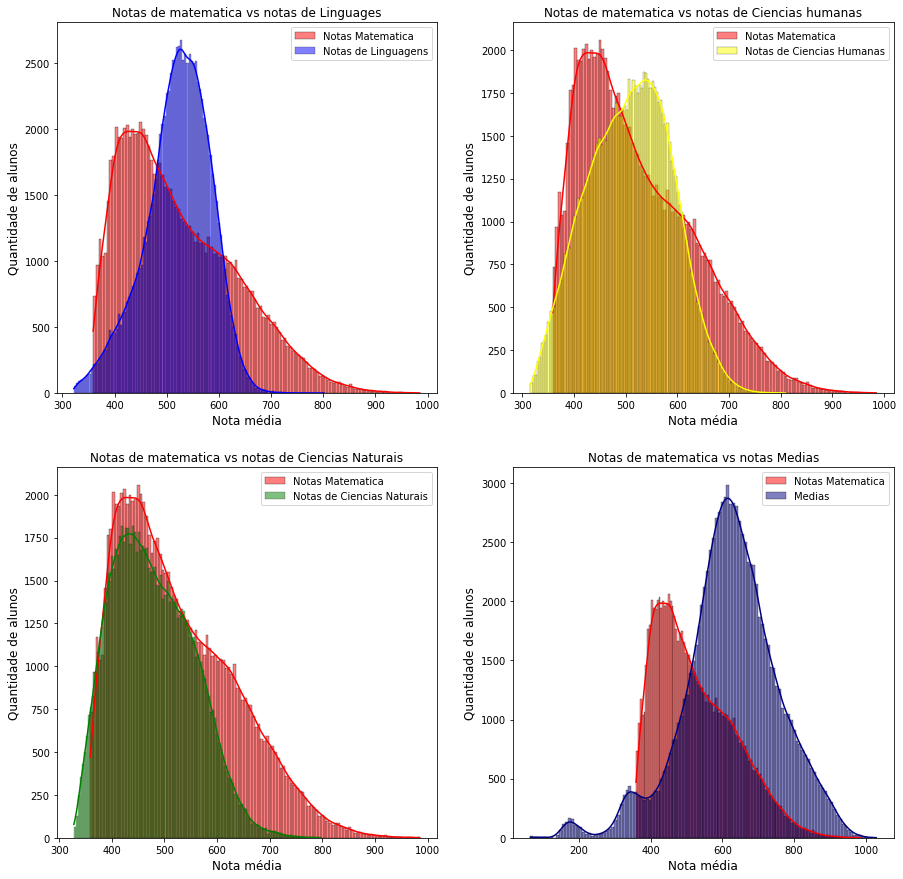

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.histplot(data=dados_enem_2019.query('NU_NOTA_MT !=0'),x='NU_NOTA_MT',label='Notas Matematica',kde=True,bins=120,color='red')
sns.histplot(data=dados_enem_2019.query('NU_NOTA_LC !=0'),x='NU_NOTA_LC',color='blue',label='Notas de Linguagens',kde=True,bins=120)
plt.title('Notas de matematica vs notas de Linguages')
plt.xlabel('Nota média', fontsize=12)
plt.ylabel('Quantidade de alunos', fontsize=12)
plt.legend()

plt.subplot(2,2,2)
sns.histplot(data=dados_enem_2019.query('NU_NOTA_MT !=0'),x='NU_NOTA_MT',label='Notas Matematica',kde=True,bins=120,color='red')
sns.histplot(data=dados_enem_2019.query('NU_NOTA_CH !=0'),x='NU_NOTA_CH',color='yellow',label='Notas de Ciencias Humanas',kde=True,bins=120)
plt.title('Notas de matematica vs notas de Ciencias humanas')
plt.xlabel('Nota média', fontsize=12)
plt.ylabel('Quantidade de alunos', fontsize=12)
plt.legend()

plt.subplot(2,2,3)
sns.histplot(data=dados_enem_2019.query('NU_NOTA_MT !=0'),x='NU_NOTA_MT',label='Notas Matematica',kde=True,bins=120,color='red')
sns.histplot(data=dados_enem_2019.query('NU_NOTA_CN !=0'),x='NU_NOTA_CN',color='green',label='Notas de Ciencias Naturais',kde=True,bins=120)
plt.title('Notas de matematica vs notas de Ciencias Naturais')
plt.xlabel('Nota média', fontsize=12)
plt.ylabel('Quantidade de alunos', fontsize=12)
plt.legend()

plt.subplot(2,2,4)
sns.histplot(data=dados_enem_2019.query('NU_NOTA_MT !=0'),x='NU_NOTA_MT',label='Notas Matematica',kde=True,bins=120,color='red')
sns.histplot(data=dados_enem_2019.query('NT_TOTAL_MEDIA !=0'),x='NT_TOTAL_MEDIA',color='navy',label='Medias',kde=True,bins=120)
plt.title('Notas de matematica vs notas Medias')
plt.xlabel('Nota média', fontsize=12)
plt.ylabel('Quantidade de alunos', fontsize=12)
plt.legend()

plt.show()

Analisando os graficos é possivel perceber que a premissa sobre matemática ser a maior dificuldade não é  válida, na maior parte dos casos ciencias naturais  é a maior difculdade dos alunos. tambem podemos ver que em geral, os alunos que possuem maior media em matematica acabam não tendo o mesmo desempenho nas outras materias.

##Notas e o tipo de escola
<p>Podemos tambem analisar as notas pelo tipo de  escola onde o aluno estudou

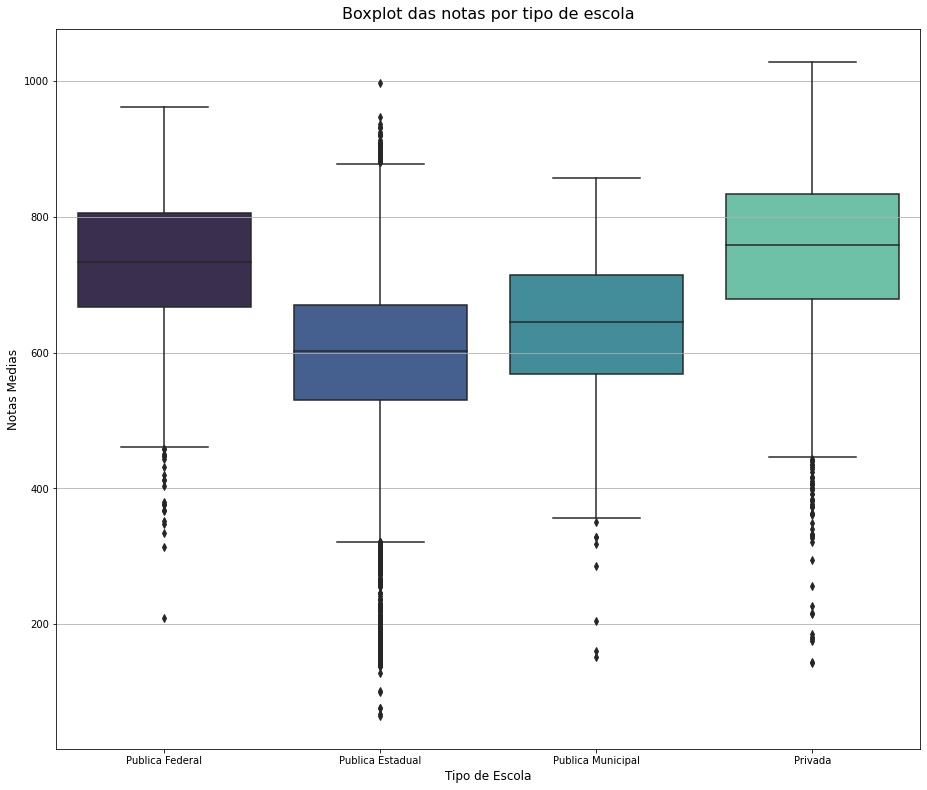

In [ ]:
fig=plt.figure(figsize=(12,10))
axis= fig.add_axes([0,0,1,1])
sns.boxplot(data=dados_enem_2019.query('NT_TOTAL_MEDIA !=0'),y='NT_TOTAL_MEDIA',x='TP_DEPENDENCIA_ADM_ESC',palette='mako')
plt.grid(axis='y')
axis.set_xticklabels(['Publica Federal','Publica Estadual','Publica Municipal','Privada'])
plt.xlabel('Tipo de Escola', fontsize=12)
plt.ylabel('Notas Medias', fontsize=12)
plt.title('Boxplot das notas por tipo de escola',fontsize=16,pad=10)
plt.show()

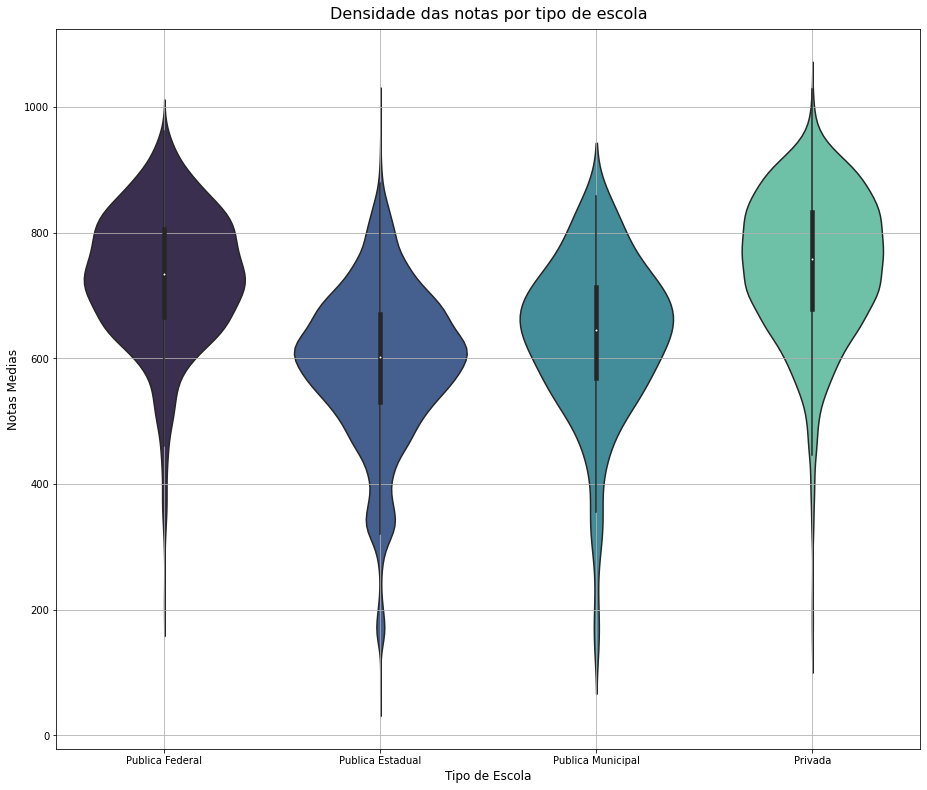

In [ ]:
fig = plt.figure(figsize=(12,10))
axis= fig.add_axes([0,0,1,1])
sns.violinplot(data=dados_enem_2019.query('NT_TOTAL_MEDIA !=0'),y='NT_TOTAL_MEDIA',x='TP_DEPENDENCIA_ADM_ESC',palette='mako')
axis.set_xticklabels(['Publica Federal','Publica Estadual','Publica Municipal','Privada'])
plt.xlabel('Tipo de Escola', fontsize=12)
plt.ylabel('Notas Medias', fontsize=12)
plt.title('Densidade das notas por tipo de escola',fontsize=16,pad=10)
plt.grid(True)

Com os graficos acima podemos ver que o desempenho dos alunos das escolas privadas é superior as das escolas publicas contudo temos que notar o bom dsempenho dos alunos das escolas publicas federais.

##Geografia dos Melhores e Piores Resuldados


Podemos  tambem fazer uma analise complementar para achar onde está a maior parte dos alunos com bom e mal desempenho. Uma informação como essa pode nos ajudar em onde devemos nos esforçar mais para a melhoria do ensino

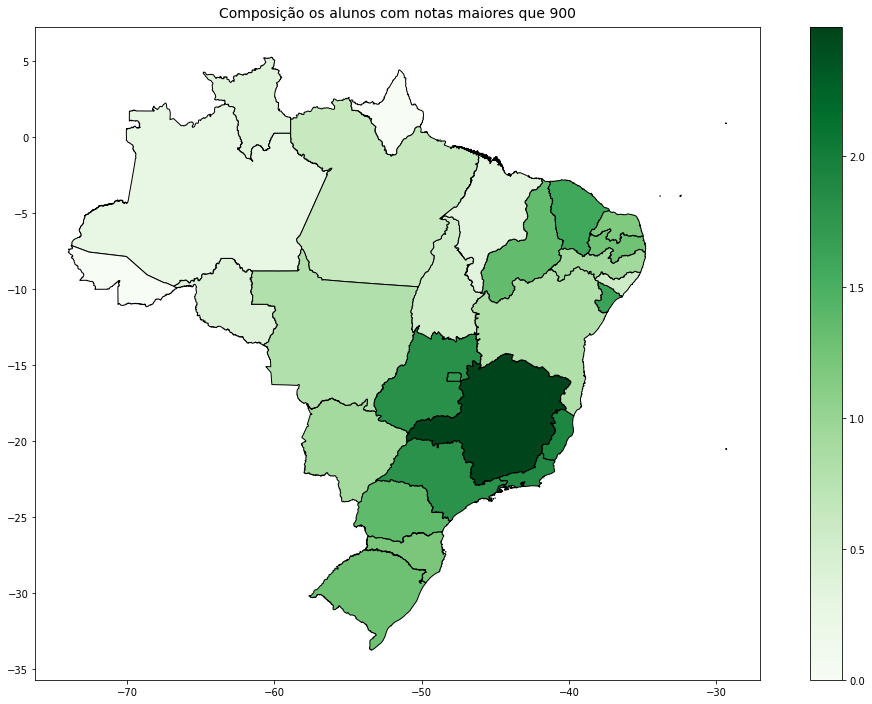

In [ ]:
dados_enem_2019_estado.plot(column='%_NOTA_MAIOR_900', cmap='Greens', figsize=(18,12),legend=True,edgecolor='k')
plt.title('Composição os alunos com notas maiores que 900', fontsize=14, pad=10)
plt.show()

Temos então o estado de Minas Gerais se destacando com a maior proporção de alunos com notas superiores a 900

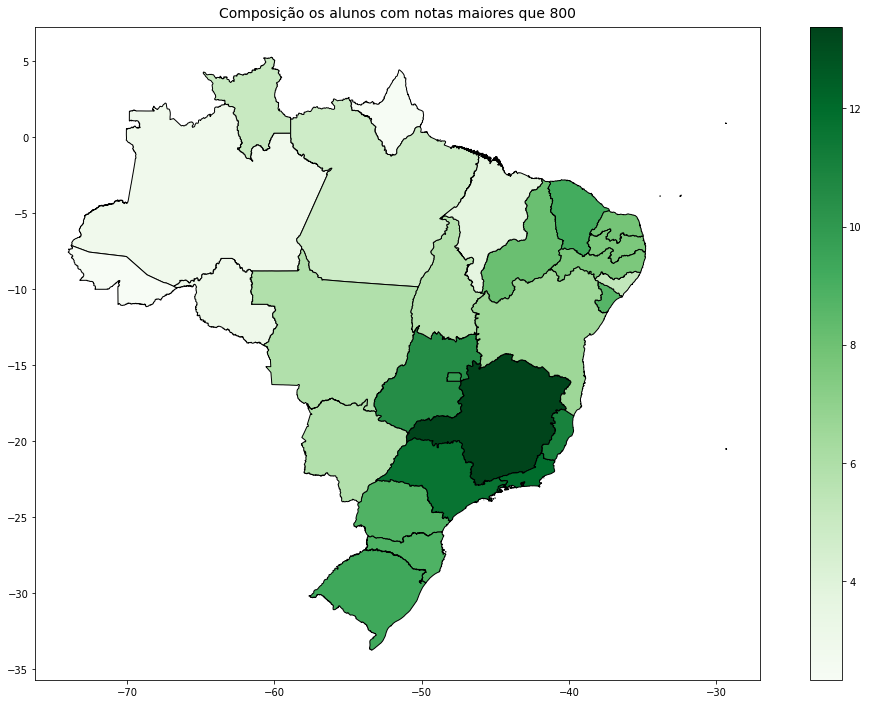

In [ ]:
dados_enem_2019_estado.plot(column='%_NOTA_MAIOR_800', cmap='Greens', figsize=(18,12),legend=True,edgecolor='k')
plt.title('Composição os alunos com notas maiores que 800', fontsize=14, pad=10)
plt.show()

Novamente estado de Minas Gerais se destacando com a maior proporção de alunos com notas superiores a 800, passando de 12% dos alunos
<p>É possivel tambem vermos a proporção de alunos com notas baixas

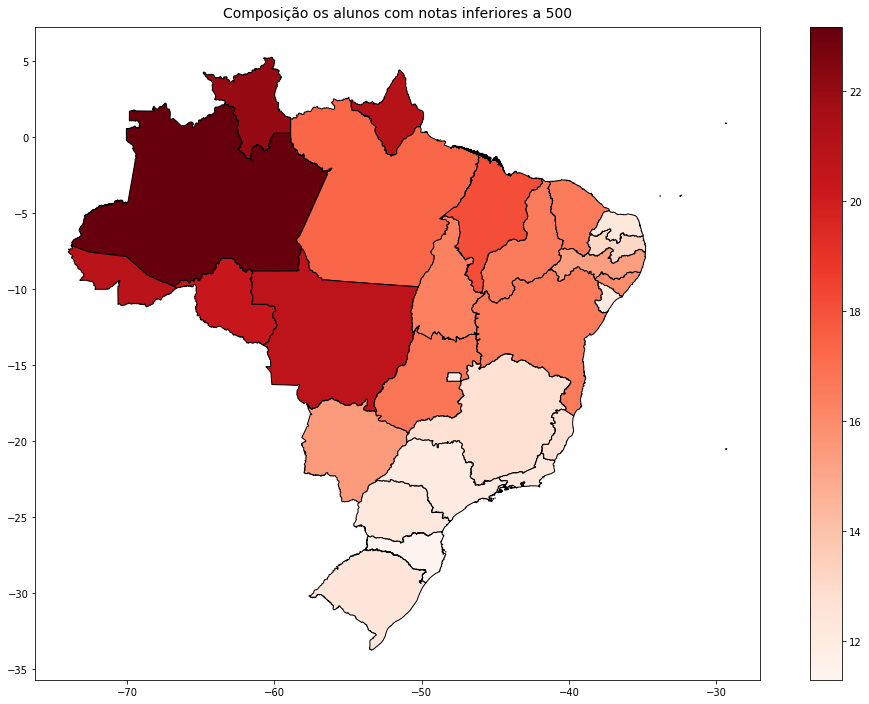

In [ ]:
dados_enem_2019_estado.plot(column='%_NOTA_MENOR_500', cmap='Reds', figsize=(18,12),legend=True,edgecolor='k')
plt.title('Composição os alunos com notas inferiores a 500', fontsize=14, pad=10)
plt.show()

Infelizmente temos o Estado do Amazonas se destacando negativamente, chegando a ter mais de 22% de seus estudantes com notas inferiores a 500.

##Distribuição por Renda

Sabemos que o brasil é um pais  muito desigual e podemos  ver essa desigualdade usando dos dados do socioeconomicos do enem

In [ ]:
lista_heat=[]
lista_heat.append(dados_enem_2019_estado.columns[0])
for i in range(len((dados_enem_2019_estado.columns[9:]))):
  lista_heat.append(dados_enem_2019_estado.columns[9:][i])

In [ ]:
composicao_rendas_dict = {'%A':'Nenhuma renda','%B':'Até R$ 998,00','%C':'De R$ 998,01 até R$ 1.497,00','%D':'De R$ 1.497,01 até R$ 1.996,00','%E':'De R$ 1.996,01 até R$ 2.495,00','%F':'De R$ 2.495,01 até R$ 2.994,00','%G':'De R$ 2.994,01 até R$ 3.992,00.','%H':'De R$ 3.992,01 até R$ 4.990,00','%I':'De R$ 4.990,01 até R$ 5.988,00','%J':'De R$ 5.988,01 até R$ 6.986,00','%K':'De R$ 6.986,01 até R$ 7.984,00','%L':'De R$ 7.984,01 até R$ 8.982,00','%M':'De R$ 8.982,01 até R$ 9.980,00','%N':'De R$ 9.980,01 até R$ 11.976,00','%O':'De R$ 11.976,01 até R$ 14.970,00','%P':'De R$ 14.970,01 até R$ 19.960,00','%Q':'Mais de R$ 19.960,00'}
df_heat = dados_enem_2019_estado[lista_heat]
df_heat.rename(columns=composicao_rendas_dict,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


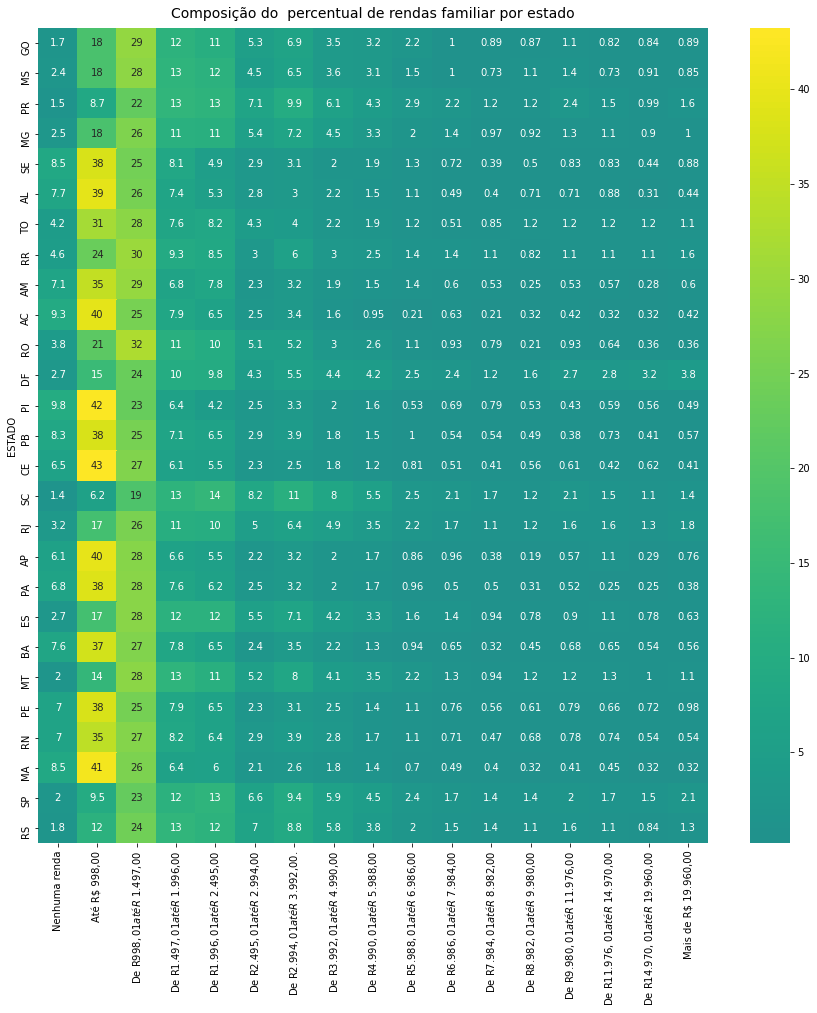

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_heat.set_index('ESTADO'),cmap='viridis',center=0, annot=True)
plt.title('Composição do  percentual de rendas familiar por estado',pad=10,fontsize=14)
plt.show()

Observavel que a maior parte da composição de alunos possuem renda familiar até R$ 998,00
<p>
Onde estão as maiores composições de alunos da mais alta renda no Brasil:

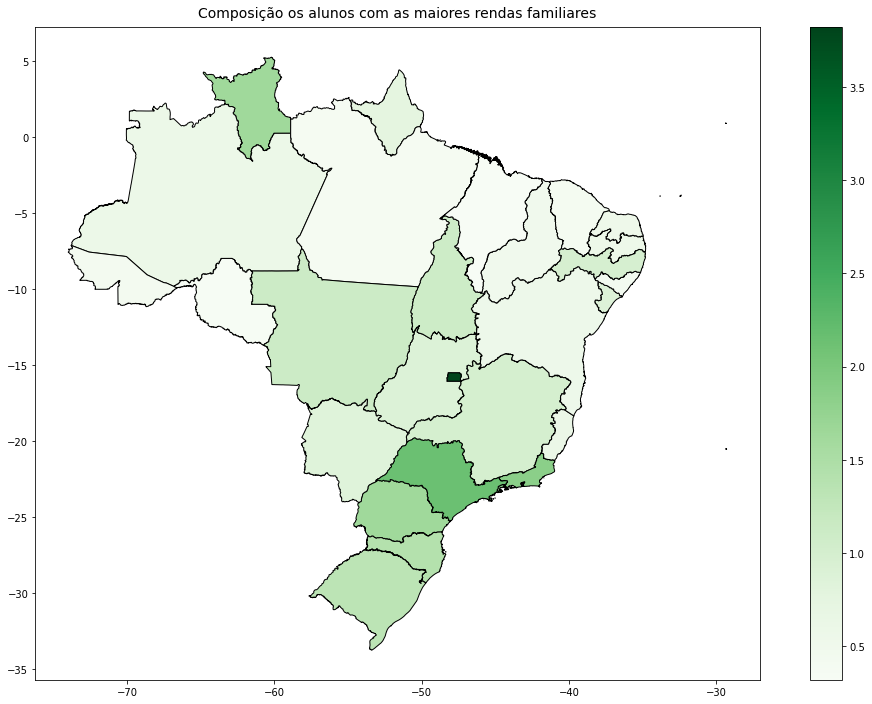

In [ ]:
dados_enem_2019_estado.plot(column='%Q', cmap='Greens', figsize=(18,12),legend=True,edgecolor='k')
plt.title('Composição os alunos com as maiores rendas familiares', fontsize=14, pad=10)
plt.show()

Facilmente observavel o Distrito Federal concentra  a maior  composição dos alunos com a maior renda familiar
<p>Onde estão as maiores composiçoes dos alunos sem renda familiar:

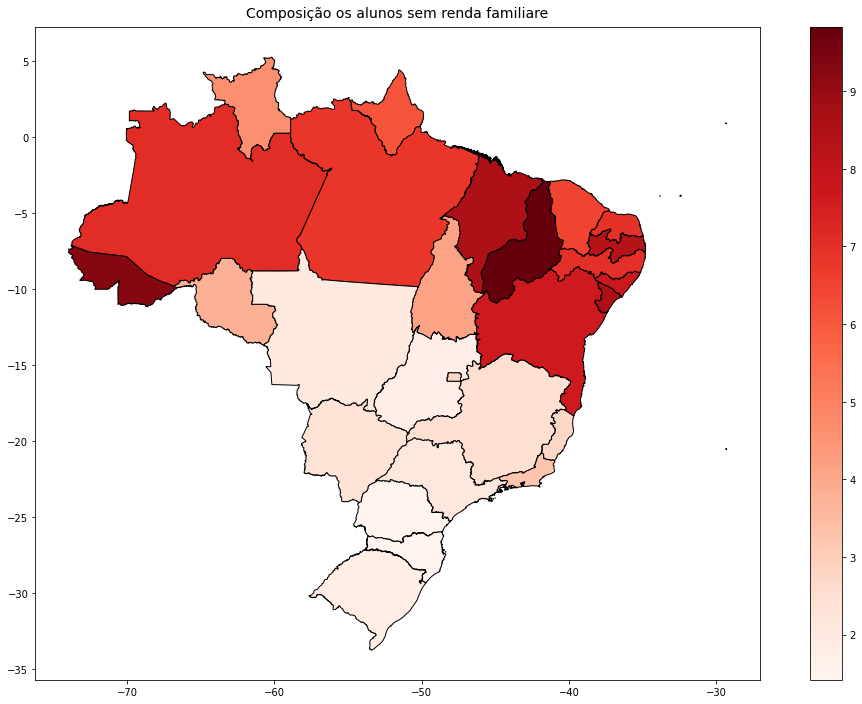

In [ ]:
dados_enem_2019_estado.plot(column='%A', cmap='Reds', figsize=(18,12),legend=True,edgecolor='k')
plt.title('Composição os alunos sem renda familiare', fontsize=14, pad=10)
plt.show()

Um triste dado saber que há predominancia do norte e nordeste com  alta composição de alunos sem renda familiar com destaque para o Piauí e Acre onde passa de  9% dos alunos sem qualquer tipo de renda
<p> Podemos plotar este mapa tambem para a renda familiar até R$ 998,00, onde se encontram a maior parte da composição dos alunos

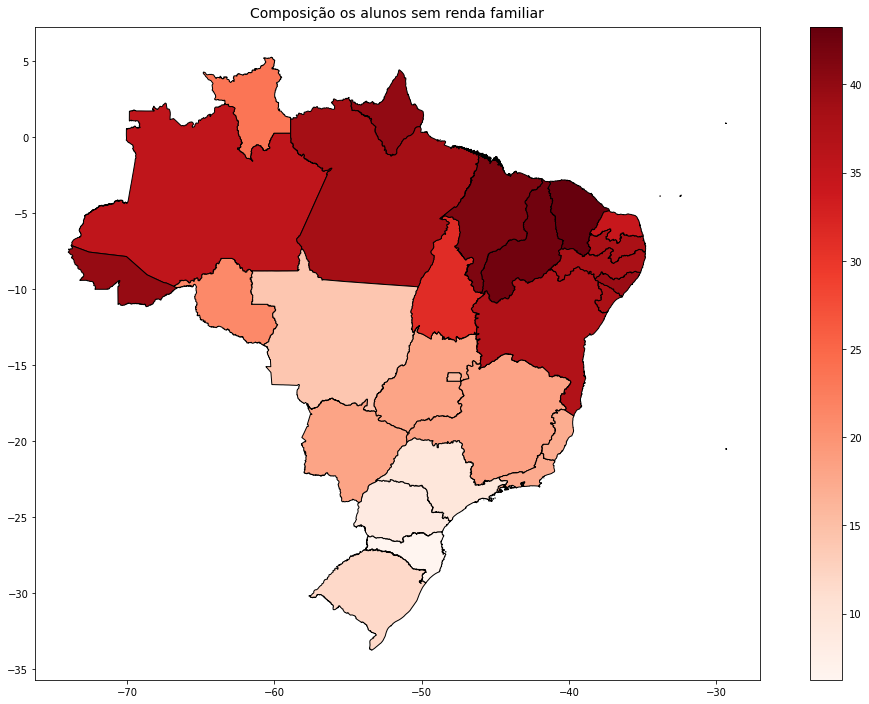

In [ ]:
dados_enem_2019_estado.plot(column='%B', cmap='Reds', figsize=(18,12),legend=True,edgecolor='k')
plt.title('Composição os alunos sem renda familiar', fontsize=14, pad=10)
plt.show()

Outro triste destaque negativo para as regioes norte e nordeste

##Consideraçoes finais

Nunca foi segredo que as oportunidade e as melhores infraestruturas do pais se concentram no eixo sul-sudeste. Os dados  extraidos e exibidos acima só jogam isso na nossa cara mais uma vez. Podemos observar tambem o quanto a pobreza e a falta de acesso consegue influenciar na educação basica e com isso   dificulta mais ainda  o acesso a educação de nivel superior.
Há duas formas  de encarar os resultados apresentados, lamentando a situação ou pautando nossos esforços para a redução da pobreza e da falta de acesso à uma educação de qualidade, e temos uma grande aliada nesse combate, a tecnologia.